<a href="https://colab.research.google.com/github/Fatim-Sohail/CN-Labs/blob/master/RR_Queueing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean number of customers in queue:
Queue 0: 0.22
Queue 1: 2.10
Queue 2: 0.05
Mean blocking probability:
Queue 0: 0.00
Queue 1: 0.00
Queue 2: 0.00
Mean number of customers in queue:
Queue 0: 4.43
Queue 1: 1.11
Queue 2: 0.39
Mean blocking probability:
Queue 0: 0.00
Queue 1: 0.00
Queue 2: 0.00


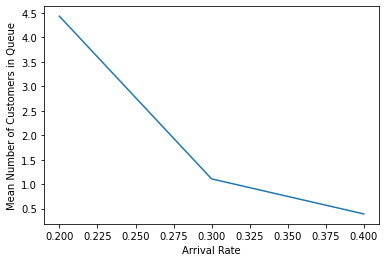

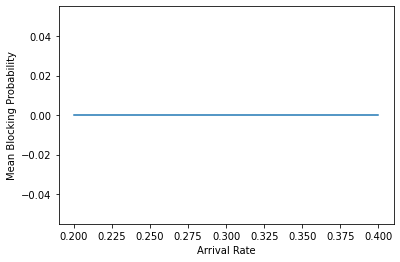

In [3]:
import random

# Simulation parameters
num_of_queues = 3
arrival_rate = [0.2, 0.3, 0.4]
queue_size = [10, 15, 20]
service_time = 2

# Performance measures
eq_sum = [0.0] * num_of_queues
blocking_prob = [0.0] * num_of_queues
num_of_cus_in_q = [0] * num_of_queues
num_of_cus_arrived = [0] * num_of_queues
num_of_cus_blocked = [0] * num_of_queues
ttime = 0.0

# Event calendar
event_calendar = []

# Initialize event calendar
for q in range(num_of_queues):
    time = random.expovariate(arrival_rate[q])
    event_calendar.append(('arrival', time, q))

# Run simulation
while event_calendar:
    event = event_calendar.pop(0)
    ttime = event[1]
    if event[0] == 'arrival':
        q = event[2]
        num_of_cus_arrived[q] += 1
        if num_of_cus_in_q[q] < queue_size[q]:
            num_of_cus_in_q[q] += 1
            eq_sum[q] += num_of_cus_in_q[q] * (ttime - sum(blocking_prob))
            time = random.expovariate(1/service_time)
            event_calendar.append(('departure', ttime + time, q))
        else:
            num_of_cus_blocked[q] += 1
            blocking_prob[q] = num_of_cus_blocked[q] / num_of_cus_arrived[q]
    elif event[0] == 'departure':
        q = event[2]
        num_of_cus_in_q[q] -= 1
        eq_sum[q] += num_of_cus_in_q[q] * (ttime - sum(blocking_prob))
        if num_of_cus_in_q[q] > 0:
            time = random.expovariate(1/service_time)
            event_calendar.append(('departure', ttime + time, q))

# Calculate performance measures
mean_num_of_cus_in_q = [eq_sum[q] / ttime for q in range(num_of_queues)]

print("Mean number of customers in queue:")
for q in range(num_of_queues):
    print("Queue {}: {:.2f}".format(q, mean_num_of_cus_in_q[q]))

print("Mean blocking probability:")
for q in range(num_of_queues):
    print("Queue {}: {:.2f}".format(q, blocking_prob[q]))


#  Plot

import random
import matplotlib.pyplot as plt

# Simulation parameters
num_of_queues = 3
arrival_rate = [0.2, 0.3, 0.4]
queue_size = [10, 15, 20]
service_time = 2

# Performance measures
eq_sum = [0.0] * num_of_queues
blocking_prob = [0.0] * num_of_queues
num_of_cus_in_q = [0] * num_of_queues
num_of_cus_arrived = [0] * num_of_queues
num_of_cus_blocked = [0] * num_of_queues
ttime = 0.0

# Event calendar
event_calendar = []

# Initialize event calendar
for q in range(num_of_queues):
    time = random.expovariate(arrival_rate[q])
    event_calendar.append(('arrival', time, q))

# Run simulation
while event_calendar:
    event = event_calendar.pop(0)
    ttime = event[1]
    if event[0] == 'arrival':
        q = event[2]
        num_of_cus_arrived[q] += 1
        if num_of_cus_in_q[q] < queue_size[q]:
            num_of_cus_in_q[q] += 1
            eq_sum[q] += num_of_cus_in_q[q] * (ttime - sum(blocking_prob))
            time = random.expovariate(1/service_time)
            event_calendar.append(('departure', ttime + time, q))
        else:
            num_of_cus_blocked[q] += 1
            blocking_prob[q] = num_of_cus_blocked[q] / num_of_cus_arrived[q]
    elif event[0] == 'departure':
        q = event[2]
        num_of_cus_in_q[q] -= 1
        eq_sum[q] += num_of_cus_in_q[q] * (ttime - sum(blocking_prob))
        if num_of_cus_in_q[q] > 0:
            time = random.expovariate(1/service_time)
            event_calendar.append(('departure', ttime + time, q))

# Calculate performance measures
mean_num_of_cus_in_q = [eq_sum[q] / ttime for q in range(num_of_queues)]

print("Mean number of customers in queue:")
for q in range(num_of_queues):
    print("Queue {}: {:.2f}".format(q, mean_num_of_cus_in_q[q]))

print("Mean blocking probability:")
for q in range(num_of_queues):
    print("Queue {}: {:.2f}".format(q, blocking_prob[q]))

# Plot performance measures
plt.plot(arrival_rate, mean_num_of_cus_in_q)
plt.xlabel("Arrival Rate")
plt.ylabel("Mean Number of Customers in Queue")
plt.show()

plt.plot(arrival_rate, blocking_prob)
plt.xlabel("Arrival Rate")
plt.ylabel("Mean Blocking Probability")
plt.show()


# Fatimah Sohail Shaukat
# 2020-CE-37